In this work, we are going to use the passengers' data of the Titanic. The main aim will be to predict wethere a passenger survived the accident or not. The prediction will be done using a random forest algorithm and based on several informations like the passenger age, his sexe, his class on the boat, and more...

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees

### Libraries

In [81]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Reading the data

In [82]:
data = pd.read_csv("data\\titanic.csv")

string_list = [each_string.lower() for each_string in data.columns]
data.columns = string_list
data.dropna(inplace=True)

print(data.head(5))

    passengerid  survived  pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 name     sex   age  sibsp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    parch    ticket     fare cabin embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S  


### Data Visualization

---Classes---
Classes :  [1 3 2]
Passengers by class :  [158  15  10]


[Text(0, 0, '158'), Text(0, 0, '15'), Text(0, 0, '10')]

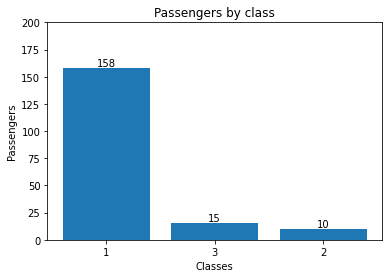

In [67]:
print('---Classes---')
Classes = data['pclass'].unique()
Passengers_per_class = data['pclass'].value_counts().values
print('Classes : ', Classes)
print('Passengers by class : ', Passengers_per_class)

fig, ax = plt.subplots()
bar_container = ax.bar([str(elm) for elm in Classes], Passengers_per_class)
ax.set(xlabel='Classes', ylabel='Passengers', title='Passengers by class', ylim=(0, 200))
ax.bar_label(bar_container)

---Genres---
Gender : ['female' 'male']
Passengengers by gender : [95 88]


[Text(0, 0, '95'), Text(0, 0, '88')]

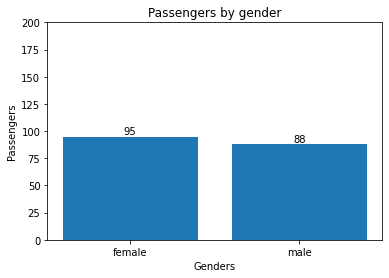

In [68]:
print('---Genres---')
genders =  data['sex'].unique()
Passengers_per_gender = data['sex'].value_counts().values
print('Gender :', genders)
print('Passengengers by gender :', Passengers_per_gender)

fig, ax = plt.subplots()
bar_container = ax.bar([str(elm) for elm in genders], Passengers_per_gender)
ax.set(xlabel='Genders', ylabel='Passengers', title='Passengers by gender', ylim=(0, 200))
ax.bar_label(bar_container)

---Age---
Age ranges : [(0, 19), (20, 30), (31, 40), (41, 50), (51, 60), (61, 80)]
Passengengers by age range : [39, 30, 36, 33, 27, 24]


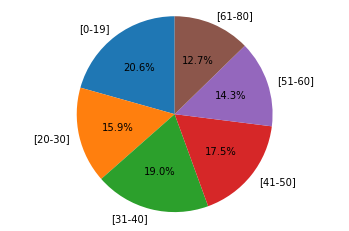

In [76]:
print('---Age---')
ages =  data['age'].unique()

ranges = [(0,19), (20,30), (31,40), (41,50), (51,60), (61,80)]

Passengers_by_age_ranges = []
for elm in ranges:
    som = 0
    for age in ages:
        if age>=elm[0] and age<=elm[1]:
            som+= len(data[data['age']==21].value_counts())
    Passengers_by_age_ranges.append(som)

print('Age ranges :', ranges)
print('Passengengers by age range :', Passengers_by_age_ranges)

fig, ax = plt.subplots()
sum = 0
for elm in Passengers_by_age_ranges:
    sum+= elm 
ax.pie([(elm/sum)*100 for elm in Passengers_by_age_ranges], labels = ['['+str(elm[0])+'-'+str(elm[1])+']' for elm in ranges],autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.show()



### Data prepocessing

In [83]:
# binarie columns
Y = data[['survived']].copy()
X = data[['pclass', 'sex', 'age', 'fare', 'embarked']].copy()
lb = preprocessing.LabelBinarizer()

X['sex'] = lb.fit_transform(X['sex'])
X['embarked'] = lb.fit_transform(X['embarked'])

print(X.head(5))

    pclass  sex   age     fare  embarked
1        1    0  38.0  71.2833         1
3        1    0  35.0  53.1000         0
6        1    1  54.0  51.8625         0
10       3    0   4.0  16.7000         0
11       1    0  58.0  26.5500         0


In [85]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Model evalution function

In [86]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
    

IndentationError: expected an indented block (Temp/ipykernel_8952/2886666123.py, line 1)